Mounted at /content/drive
img:  <class 'numpy.ndarray'> (213, 320, 3)


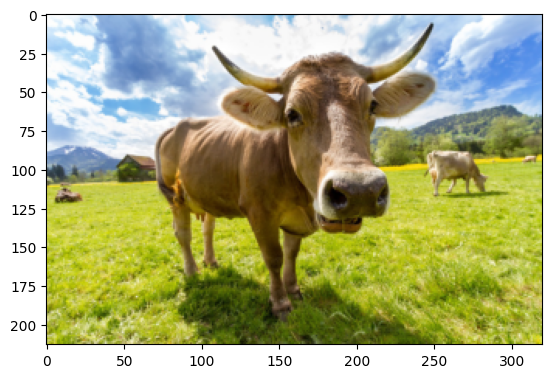

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path # ファイルシステム
from google.colab import drive # Google drive
drive.mount('/content/drive')
p = Path('/content/drive/My Drive/iicex/')  # 画像ファイルのフォルダ
#list( p.iterdir() )  # フォルダの内容をリストにする


from skimage import io #入出力ライブラリ読込
img = io.imread('/content/drive/My Drive/iicex/cow.png')  # 画像ファイルの読み込み
#from PIL import Image #pillow読込
#PILimg = Image.open('/content/drive/My Drive/iicex/baboon.png')  # 画像ファイルの読み込み
#img = PILimg.convert('L') #グレイスケール変換
sampleimg = np.asarray(img) #numpy配列に変換
#print("PILimg: ", type(PILimg))
print("img: ", type(sampleimg), sampleimg.shape)

#plt.imshow(sampleimg, cmap='gray', vmin=0, vmax=255)
plt.imshow(sampleimg)

mat
 [[ 0.7878462   0.13891854  0.3674127 ]
 [-0.13891854  0.7878462  48.73943235]]
img4.shape (213, 320, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

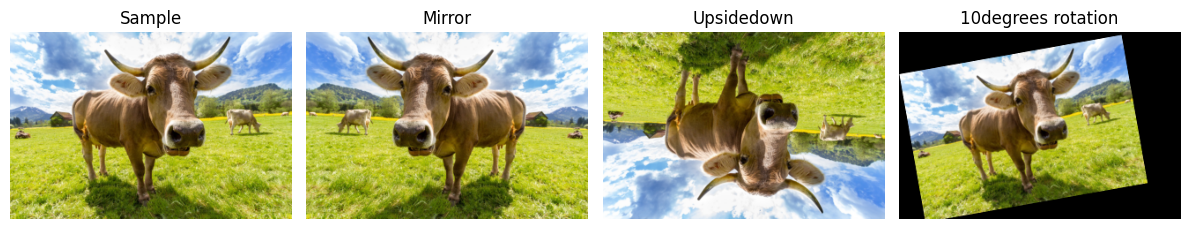

In [ ]:
#https://note.nkmk.me/python-opencv-warp-affine-perspective/

img2 = np.fliplr(sampleimg)
img3 = np.flipud(sampleimg)

import cv2
#opencvの画像は縦(Height)×横(Width)×チャンネル(Channel)のHWC形式
#変換行列の作成
#第一引数が回転の原点となる座標、第二引数が回転の角度（ラジアンではなく度degree）、第三引数が拡大・縮小倍率。
mat = cv2.getRotationMatrix2D((sampleimg.shape[0] / 2, sampleimg.shape[1] / 2), 10, 0.8)
print("mat\n", mat)
#アフィン変換の実行
#第一引数に元画像（NumPy配列ndarray）、第二引数に2 x 3の変換行列（NumPy配列ndarray）、
#第三引数に出力画像のサイズ（タプル）を指定する。
#補完処理のアルゴリズムを引数flagsで指定できる
img4 = cv2.warpAffine(sampleimg, mat, (sampleimg.shape[1], sampleimg.shape[0] ))
#ここなんでインデックス逆？↑
print("img4.shape", img4.shape)



fig, axes = plt.subplots(1, 4, figsize=(12,5), tight_layout=True, squeeze = False)
titles = ["Sample", "Mirror", "Upsidedown", "10degrees rotation"]
imgs = [sampleimg, img2, img3, img4]
for row in axes:
  for one in row:
    one.axis("off") #軸を消す
for i in range(1):
  for j in range(4):
    #if (i == 1) and (j == 3):continue
    #fig.add_subplot()は必要なくなり、配列的に処理ができるようになる。
    axes[i, j].imshow(imgs[4*i + j], cmap='gray', vmin=0, vmax=255) #このimgsの指定の仕方注意!
    axes[i, j].set_title(titles[4*i + j])
plt.show